In [1]:
import gym

from rl_agents.agents import load_agent

100%|██████████| 200000/200000 [00:27<00:00, 7390.46it/s]


[[0.50309149 0.39495892 0.39810727 0.39132439]
 [0.26571057 0.30436181 0.2836251  0.39488617]
 [0.3599388  0.3603666  0.35969464 0.36844564]
 [0.31764947 0.29699062 0.3201134  0.35911023]
 [0.51769426 0.30102773 0.29231899 0.27927293]
 [0.         0.         0.         0.        ]
 [0.29839519 0.28556312 0.31644412 0.27643167]
 [0.         0.         0.         0.        ]
 [0.29707272 0.33505003 0.33437802 0.55013356]
 [0.40574362 0.60508649 0.46021182 0.36753836]
 [0.57833019 0.53082032 0.50000889 0.40715173]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.47973921 0.57835479 0.71758231 0.51895466]
 [0.72456531 0.84984329 0.78574344 0.77823666]
 [0.         0.         0.         0.        ]]


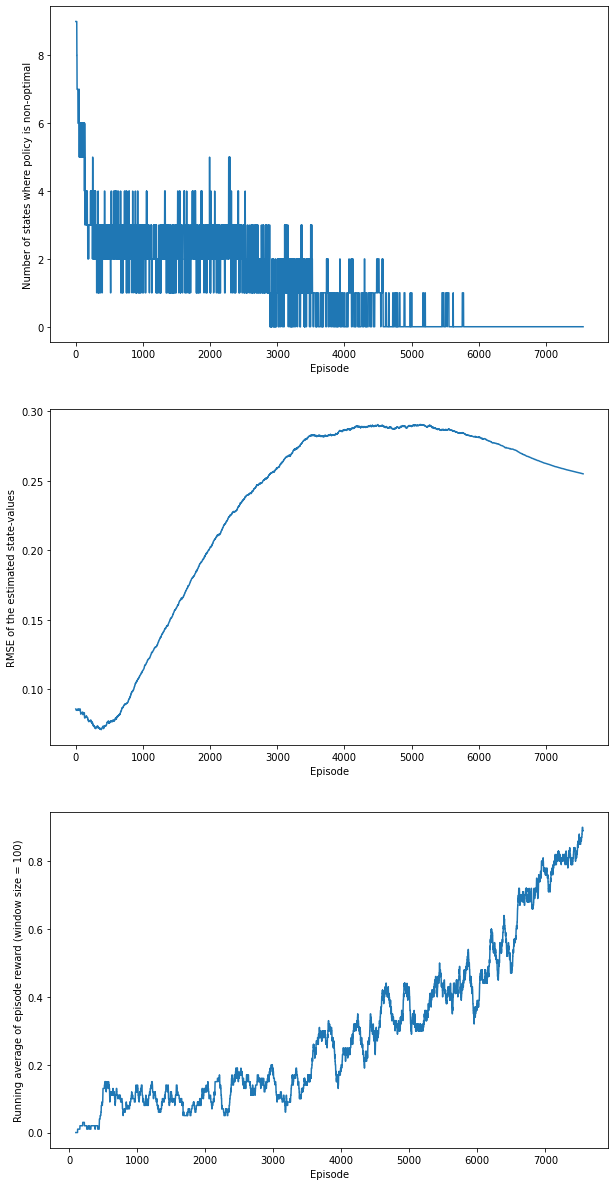

In [2]:
%run sarsa_training.py 4 200000

100%|██████████| 200000/200000 [00:46<00:00, 4327.13it/s]


[[0.8073508  0.80660411 0.80652762 0.80614688]
 [0.53102508 0.53674873 0.54403615 0.80526665]
 [0.70560147 0.70023866 0.69797997 0.80378144]
 [0.52322226 0.45777321 0.53592301 0.80297873]
 [0.80896961 0.45030762 0.48891075 0.49483174]
 [0.         0.         0.         0.        ]
 [0.52660946 0.2430552  0.48229617 0.25183641]
 [0.         0.         0.         0.        ]
 [0.57849637 0.52970466 0.49819878 0.81170948]
 [0.54874209 0.81462016 0.56490667 0.47944449]
 [0.76155661 0.59817152 0.43352599 0.47200063]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.42958456 0.56218245 0.87526111 0.54541003]
 [0.85082883 0.93944695 0.90551603 0.87124566]
 [0.         0.         0.         0.        ]]


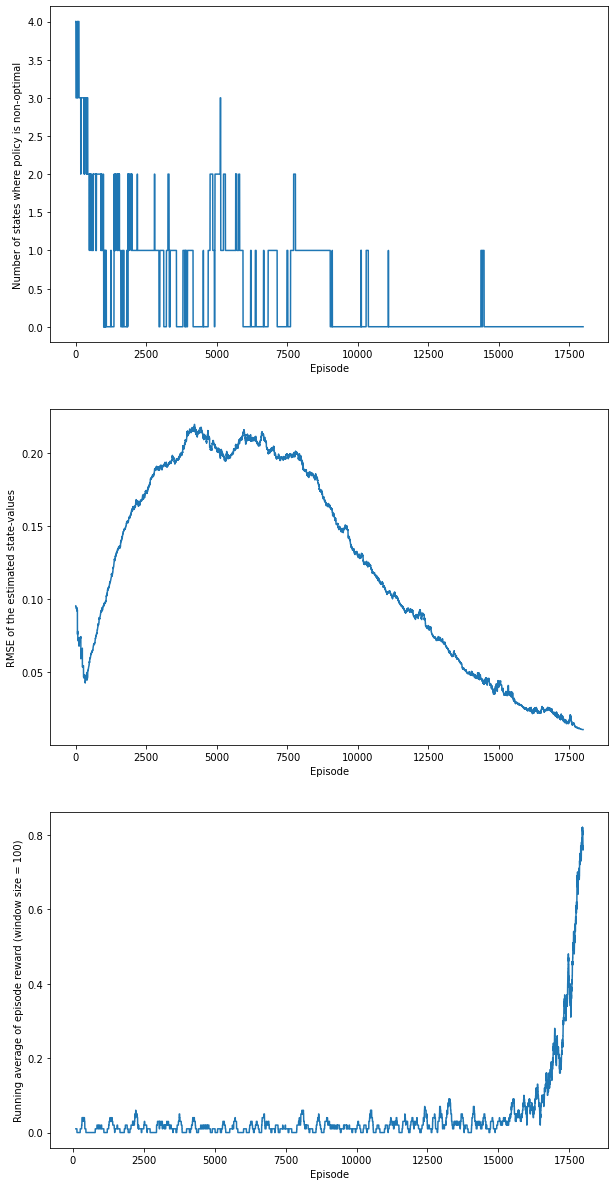

In [5]:
%run expected_sarsa_training.py 4 200000

100%|██████████| 200000/200000 [00:25<00:00, 7791.53it/s]


[[0.77607598 0.77142293 0.77149952 0.77115908]
 [0.50637321 0.48935976 0.48574833 0.76229725]
 [0.67689707 0.68569171 0.67475942 0.74843593]
 [0.49470496 0.46488205 0.48041862 0.73852472]
 [0.77633187 0.53801161 0.51799704 0.53831503]
 [0.         0.         0.         0.        ]
 [0.48071924 0.21367681 0.53730096 0.26060875]
 [0.         0.         0.         0.        ]
 [0.52707924 0.55207243 0.49870274 0.77728393]
 [0.55882197 0.77929685 0.52739266 0.49523395]
 [0.74224386 0.59513372 0.46486542 0.42116653]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.54217893 0.54880583 0.83100939 0.59015335]
 [0.81517581 0.89883919 0.86455486 0.85592195]
 [0.         0.         0.         0.        ]]


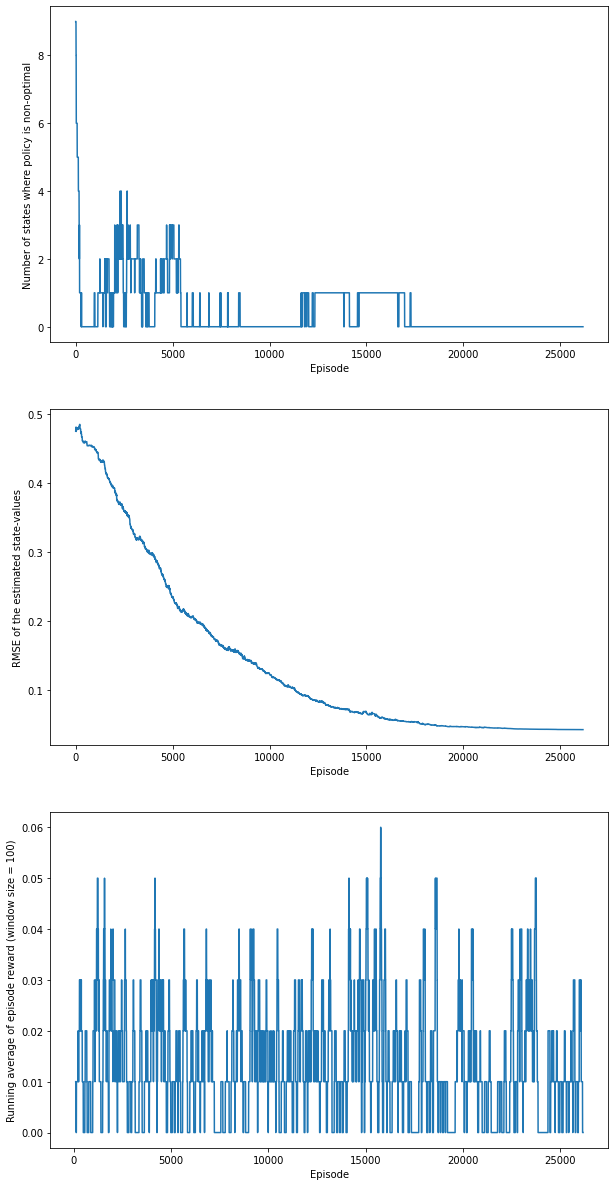

In [4]:
%run q_learning_training.py 4 200000

100%|██████████| 200000/200000 [00:28<00:00, 6976.93it/s]


[[0.80977461 0.80922492 0.80922201 0.80918944]
 [0.50287994 0.56118412 0.56166778 0.80858453]
 [0.71893923 0.7102097  0.70208346 0.80780524]
 [0.56210886 0.52823247 0.54919988 0.80746233]
 [0.80973962 0.53986935 0.52858015 0.54291325]
 [0.         0.         0.         0.        ]
 [0.53261712 0.23943395 0.46525221 0.2921442 ]
 [0.         0.         0.         0.        ]
 [0.5265907  0.56535474 0.53046021 0.80954995]
 [0.58177979 0.80893483 0.55858038 0.52959133]
 [0.75328475 0.48502918 0.46566339 0.44210469]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.57065058 0.62614919 0.86706754 0.56052737]
 [0.85327118 0.93328836 0.8923837  0.88395584]
 [0.         0.         0.         0.        ]]


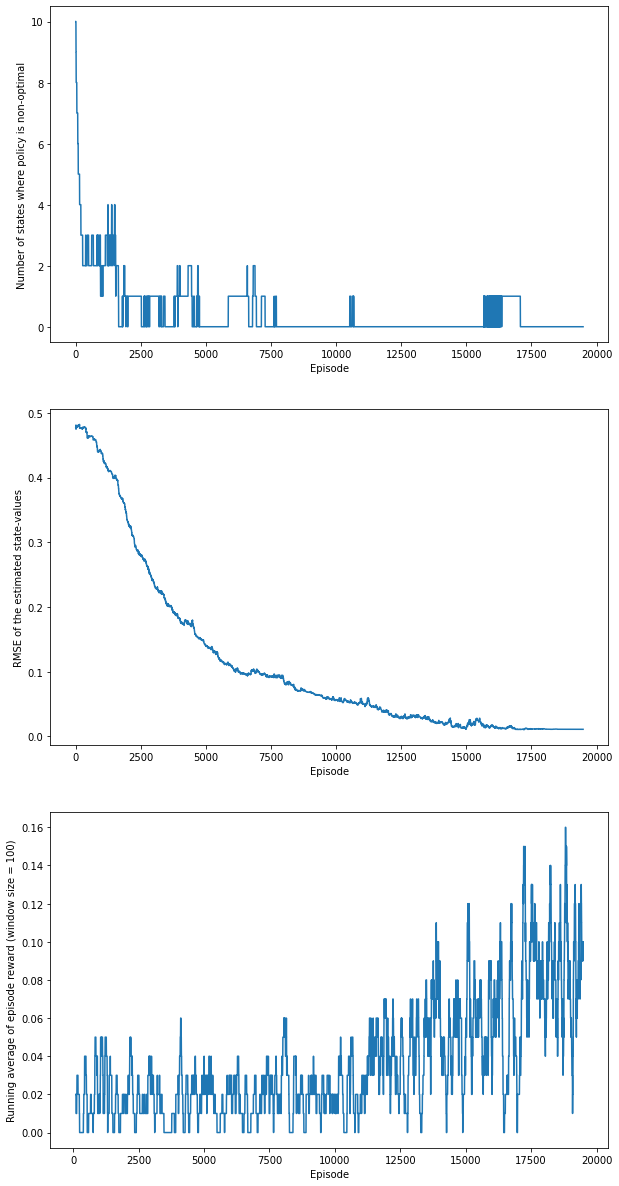

In [5]:
%run q_learning_eps_training.py 4 200000

In [6]:
# Fetch the agents that resulted from training in inference mode:
agents= {}
for alg in ('sarsa', 'expected_sarsa', 'q_learning', 'q_learning_eps'):
    agents[alg] = load_agent(f'saved_agents/{alg}_agent')
    agents[alg].set_mode('inference')

In [7]:
map_size = int(agents['sarsa'].env.observation_space.n **(1/2))

if map_size == 4:
    map_name = '4x4'
elif map_size == 8:
    map_name = '8x8'

env = gym.make('FrozenLake-v1', desc=None, map_name=map_name, is_slippery=True)
env._max_episode_steps = 10000

In [8]:
average_reward_per_episode = {}

for alg in ('sarsa', 'expected_sarsa', 'q_learning', 'q_learning_eps'):
    episodes = 0
    total_reward = 0
    observation = env.reset()
    while episodes < 10000:
        action = agents[alg].get_action(observation)
        observation, reward, done, info = env.step(action)
        total_reward += reward

        if done:
            observation = env.reset()
            episodes += 1

    average_reward_per_episode[alg] = total_reward / episodes

env.close()

In [10]:
average_reward_per_episode

{'sarsa': 0.8201,
 'expected_sarsa': 0.8215,
 'q_learning': 0.8273,
 'q_learning_eps': 0.8226}